In [2]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy
import scipy.spatial
import seaborn as sns
sns.set_theme(style="white", palette="pastel")
import warnings

from itertools import cycle
warnings.filterwarnings('ignore')
%matplotlib inline

### 1. Baixe os dados disponibilizados na plataforma Kaggle.


In [3]:
df = pd.read_csv("Country-data.csv")
df2 = pd.read_csv("data-dictionary.csv")

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df2.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


### Quantos países existem no dataset?

> 167 países

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


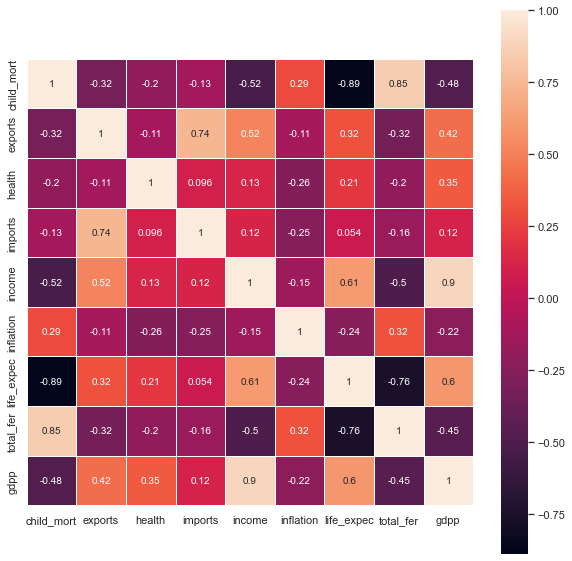

In [7]:
#3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização

corr = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, square=True, linewidths=.5, annot=True);

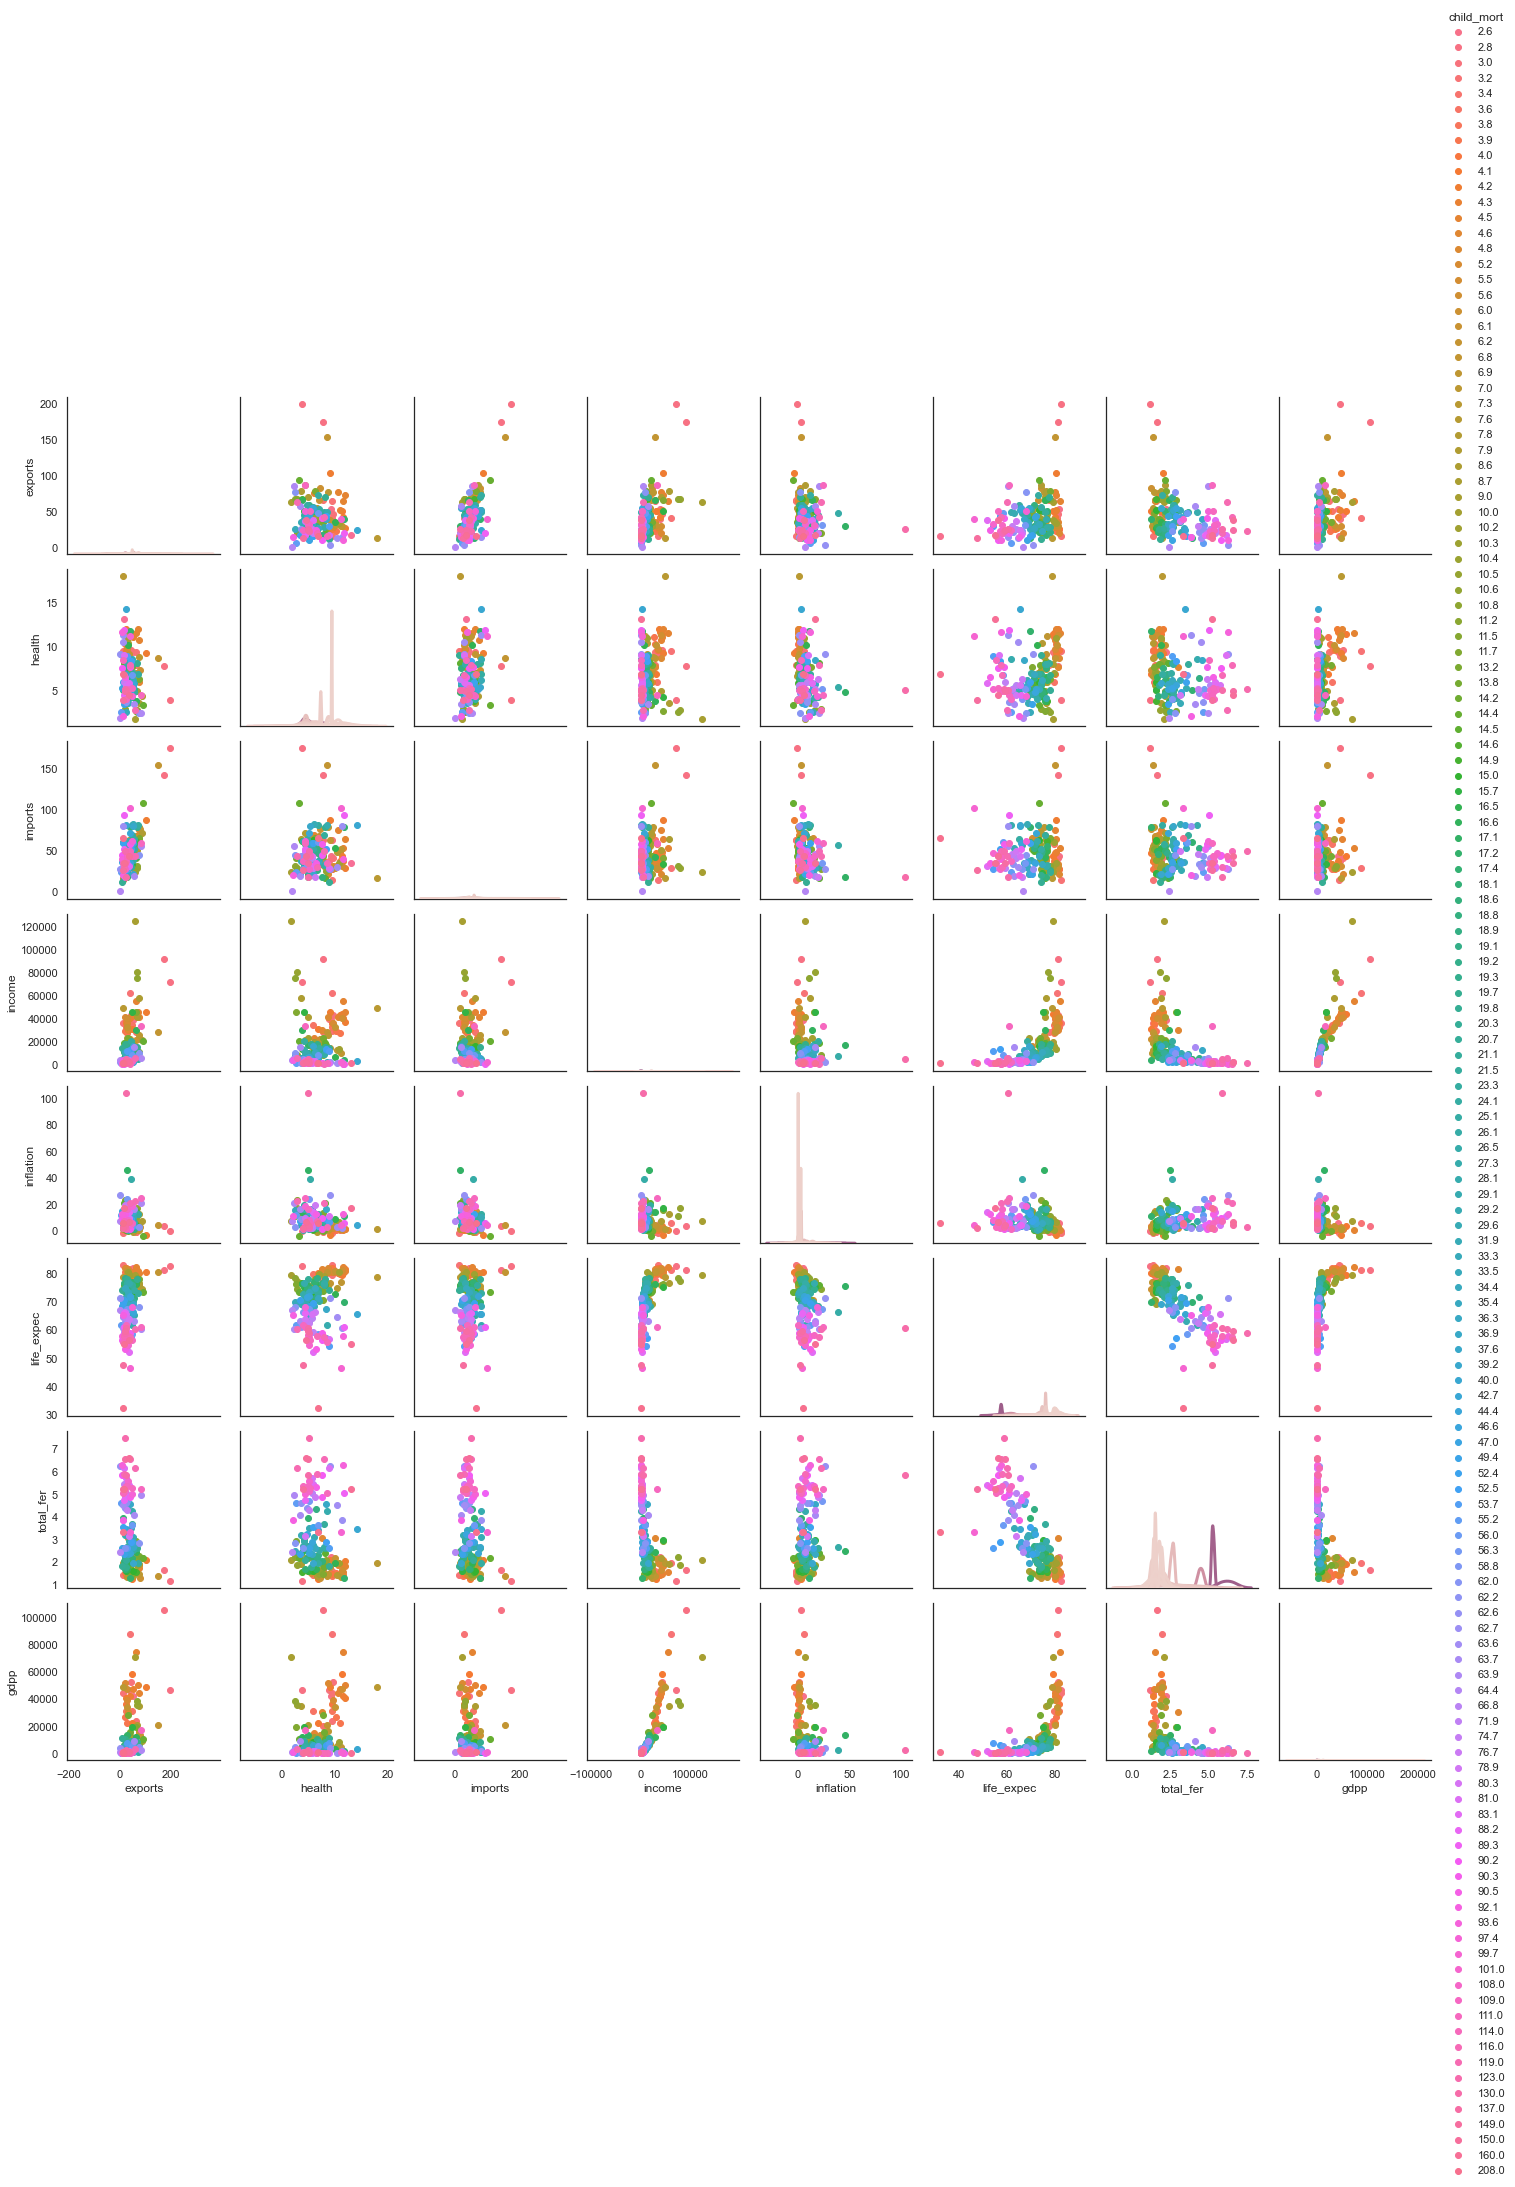

In [8]:
g = sns.PairGrid(df, hue = 'child_mort')
g.map_diag(sns.kdeplot, lw=3)
g.map_offdiag(plt.scatter)
g.add_legend()

### Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

> Priorizei os dados com pontuação acima de 0.75 para realizar a clusterização: child_mort, total_fer, income e gdpp.

> As estapas anteriores à clusterização são:
     Retirar as colunas que não serão utilizadas;
     Normalizar os dados

> Obs.: eu retirei a coluna "country" do pré-processamento e da clusterização, pois não consegui transformá-la em uma coluna numérica. Tentei duas formas e as duas deram erro. Ela foi incluída novamente depois que os clusters foram finalizados.




### Realize o pré-processamento adequado dos dados.


In [77]:
#Retirando as colunas que não serão usadas

df_alterado = df.drop(['country', 'health', 'inflation', 'life_expec', 'exports', 'imports'],axis=1)


In [78]:
df_alterado

,child_mort,income,total_fer,gdpp
0,90.2,1610,5.82,553
1,16.6,9930,1.65,4090
2,27.3,12900,2.89,4460
3,119.0,5900,6.16,3530
4,10.3,19100,2.13,12200
...,...,...,...,...
162,29.2,2950,3.50,2970
163,17.1,16500,2.47,13500
164,23.3,4490,1.95,1310
165,56.3,4480,4.67,1310


In [79]:
normalized_df = (df_alterado-df_alterado.mean())/df_alterado.std()
normalized_df.head()

,child_mort,income,total_fer,gdpp
0,1.287660,-0.805822,1.897176,-0.677143
1,-0.537333,-0.374243,-0.857394,-0.484167
2,-0.272015,-0.220182,-0.038289,-0.463980
3,2.001787,-0.583289,2.121770,-0.514720
4,-0.693548,0.101427,-0.540321,-0.041692


### K-means

In [80]:
# Criando um modelo com k = 3

modelo_v1 = KMeans(n_clusters=3, n_init=25, max_iter = 100, random_state=0)
modelo_v1.fit(normalized_df)

KMeans(max_iter=100, n_clusters=3, n_init=25, random_state=0)

In [81]:
modelo_v1.cluster_centers_

array([[-0.39858253, -0.23668559, -0.43886659, -0.31882772],
       [-0.81024487,  1.65046683, -0.69906417,  1.75279539],
       [ 1.45575416, -0.72185732,  1.45920419, -0.62226284]])

In [82]:
clusters = modelo_v1.labels_
clusters

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [83]:
cluster_df = df.copy()
cluster_df['cluster'] = clusters
cluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [84]:
cluster_df.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,22.195652,41.994446,6.509891,49.220282,12581.847826,7.030511,72.555435,2.283587,7120.456522
1,5.593750,55.968750,8.483750,46.459375,48962.500000,3.852000,80.096875,1.889687,45090.625000
2,96.979070,28.156047,6.228605,42.225581,3228.674419,12.313837,59.176744,5.156977,1558.883721


In [85]:
def plot_cluster_points(df, labels, ax=None):
    pca = PCA(2) 
    pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
    pca_data['cluster'] = pd.Categorical(labels)
    sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data, ax=ax)
    centroids = modelo_v1.cluster_centers_
    inert = modelo_v1.inertia_
    sns.scatterplot(centroids[:,0], centroids[:,1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)


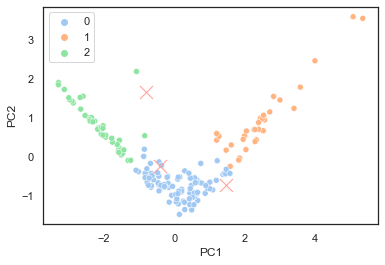

In [86]:
plot_cluster_points(normalized_df, modelo_v1.labels_)

In [87]:
cluster_df = df_alterado.copy()
cluster_df['cluster'] = modelo_v1.labels_
cluster_df['country'] = df.iloc[:,0]


In [88]:
# Lista com nomes das colunas

cluster_df

,child_mort,income,total_fer,gdpp,cluster,country
0,90.2,1610,5.82,553,2,Afghanistan
1,16.6,9930,1.65,4090,0,Albania
2,27.3,12900,2.89,4460,0,Algeria
3,119.0,5900,6.16,3530,2,Angola
4,10.3,19100,2.13,12200,0,Antigua and Barbuda
...,...,...,...,...,...,...
162,29.2,2950,3.50,2970,0,Vanuatu
163,17.1,16500,2.47,13500,0,Venezuela
164,23.3,4490,1.95,1310,0,Vietnam
165,56.3,4480,4.67,1310,2,Yemen


In [89]:
df_final = cluster_df.groupby('country').mean()

In [90]:
df_final.head()

,child_mort,income,total_fer,gdpp,cluster
country,,,,,
Afghanistan,90.2,1610.0,5.82,553.0,2.0
Albania,16.6,9930.0,1.65,4090.0,0.0
Algeria,27.3,12900.0,2.89,4460.0,0.0
Angola,119.0,5900.0,6.16,3530.0,2.0
Antigua and Barbuda,10.3,19100.0,2.13,12200.0,0.0


In [91]:
df_final['cluster'].value_counts()

0.0    92
2.0    43
1.0    32
Name: cluster, dtype: int64

In [92]:
def plot_cluster_points2(df, labels, ax=None):
    pca = PCA(2) 
    pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
    pca_data['country'] = pd.Categorical(labels)
    sns.scatterplot(x="PC1", y="PC2", hue="country", data=pca_data, ax=ax)
    centroids = modelo_v1.cluster_centers_
    inert = modelo_v1.inertia_
    sns.scatterplot(centroids[:,0], centroids[:,1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)


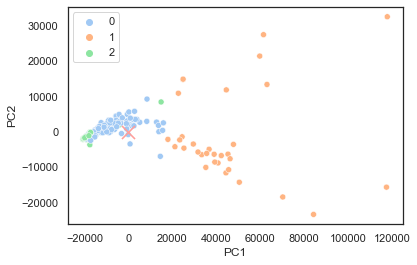

In [93]:
plot_cluster_points2(df_final, modelo_v1.labels_)

In [94]:
!pip install pivottablejs 
from pivottablejs import pivot_ui


In [107]:
pivot_ui(df_final)

### Clusterização hierárquica

In [96]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [97]:
hc = AgglomerativeClustering(n_clusters=3, affinity = "euclidean",
                             linkage = 'ward')
hc_pred = hc.fit_predict(normalized_df)


In [98]:
hc_pred

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [99]:
hc_df = df.copy()
hc_df['cluster'] = hc_pred
hc_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [100]:
hc_df.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,5.636842,57.594737,8.506316,49.836842,45594.736842,3.370711,79.844737,1.826053,41573.684211
1,95.613636,28.411591,6.278182,42.040909,3443.931818,12.411250,59.359091,5.143409,1625.727273
2,23.175294,40.311635,6.338118,48.083128,11518.000000,7.357459,72.198824,2.313059,6043.317647


In [101]:
hc_df = df_alterado.copy()
hc_df['cluster'] = hc_pred
hc_df['country'] = df.iloc[:,0]

In [102]:
df_hc =hc_df.groupby('country').mean()

In [103]:
df_hc.head()

,child_mort,income,total_fer,gdpp,cluster
country,,,,,
Afghanistan,90.2,1610.0,5.82,553.0,1.0
Albania,16.6,9930.0,1.65,4090.0,2.0
Algeria,27.3,12900.0,2.89,4460.0,2.0
Angola,119.0,5900.0,6.16,3530.0,1.0
Antigua and Barbuda,10.3,19100.0,2.13,12200.0,2.0


In [104]:
df_hc['cluster'].value_counts()

2.0    85
1.0    44
0.0    38
Name: cluster, dtype: int64

Text(0, 0.5, 'Euclidean Distance')

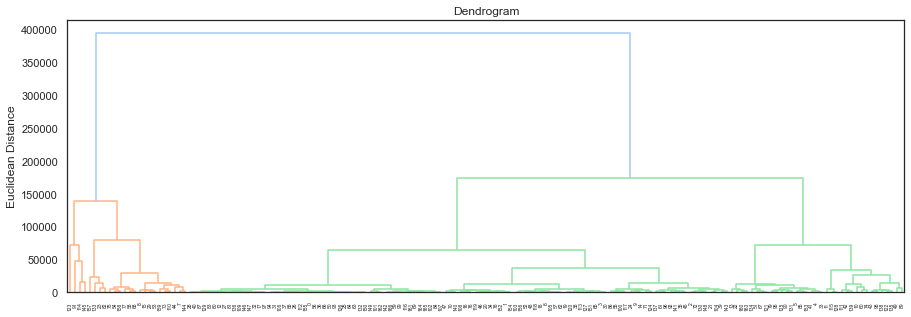

In [105]:
plt.figure(figsize=(15, 5))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(df_hc, method='ward'), labels=df.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

In [108]:
pivot_ui(df_hc)